In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pickle

In [2]:
save_dir='C:/Users/USER/Project_Fundus/dataset'

x_train = save_dir+'/x_train.pkl'
x_test = save_dir+'/x_test.pkl'
y_train = save_dir+'/y_train.pkl'
y_test = save_dir+'/y_test.pkl'

with open(x_train,'rb') as f:
    x_train = pickle.load(f)
    
with open(x_test,'rb') as f:
    x_test = pickle.load(f)
    
with open(y_train,'rb') as f:
    y_train = pickle.load(f)

with open(y_test,'rb') as f:
    y_test = pickle.load(f)

In [3]:
print(np.array(x_train).shape)
print(np.array(x_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(6590, 100, 100, 3)
(1648, 100, 100, 3)
(6590,)
(1648,)


In [4]:
x_train2 = np.array(x_train).reshape(-1,100*100*3)
x_test2 = np.array(x_test).reshape(-1,100*100*3)
y_train2 = np.array(y_train)
y_test2 = np.array(y_test)

In [5]:
svm_fundus = svm.SVC(kernel='rbf')
svm_fundus.fit(x_train2,y_train2)

SVC()

In [6]:
from sklearn.metrics import accuracy_score

y_pred = svm_fundus.predict(x_train2)
accuracy_score(y_pred,y_train2)

0.9996965098634294

In [7]:
y_pred2 = svm_fundus.predict(x_test2)

In [8]:
y_pred2 = svm_fundus.predict(x_test2)
accuracy_score(y_pred2,y_test2)

0.9987864077669902

In [9]:
np.array(x_test).shape

(1648, 100, 100, 3)

In [10]:
list = np.arange(1648)
list[y_pred2 != y_test2] #아닌 부분만 불러오고 list로 표현.

array([104, 944])

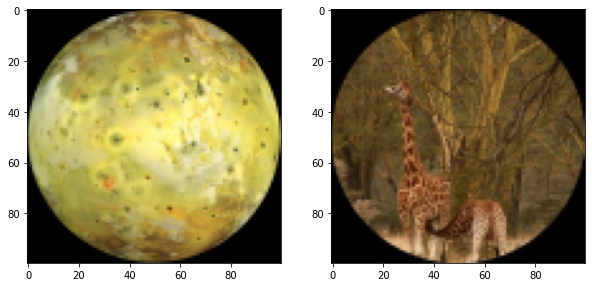

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[104])

plt.subplot(1,2,2)
plt.imshow(x_test[944])

(array([6469.,  829., 2288., 2679., 2537., 2480., 3321., 4040., 3409.,
        1948.]),
 array([0.        , 0.09960784, 0.19921569, 0.29882353, 0.39843137,
        0.49803922, 0.59764706, 0.6972549 , 0.79686275, 0.89647059,
        0.99607843]),
 <BarContainer object of 10 artists>)

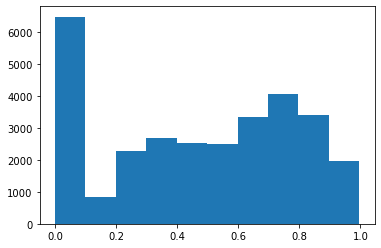

In [12]:
plt.hist(x_test2[104])

(array([7081., 5716., 4559., 6389., 3655., 1427.,  695.,  317.,  119.,
          42.]),
 array([0.        , 0.09333333, 0.18666667, 0.28      , 0.37333333,
        0.46666667, 0.56      , 0.65333333, 0.74666667, 0.84      ,
        0.93333333]),
 <BarContainer object of 10 artists>)

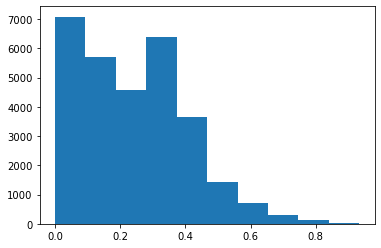

In [13]:
plt.hist(x_test2[944])

In [14]:
svm_fundus_linear = svm.LinearSVC()
svm_fundus_linear.fit(x_train2,y_train2)

y_pred = svm_fundus_linear.predict(x_train2)
accuracy_score(y_pred,y_train2)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


1.0

In [15]:
y_pred2 = svm_fundus_linear.predict(x_test2)
accuracy_score(y_pred2,y_test2)

0.9872572815533981

In [16]:
svm_fundus_poly = svm.SVC(kernel = 'poly')
svm_fundus_poly.fit(x_train2,y_train2)

y_pred = svm_fundus_poly.predict(x_train2)
accuracy_score(y_pred,y_train2)

0.9977238239757208

In [17]:
y_pred2 = svm_fundus_poly.predict(x_test2)
accuracy_score(y_pred2,y_test2)

0.9902912621359223